# **Project Name**    - **Diabetes Diagnosis Prediction**

##About Dataset:

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney
Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes
based on certain diagnostic measurements included in the dataset. Several constraints were placed
on the selection of these instances from a larger database. In particular, all patients here are females
at least 21 years old of Pima Indian heritage.2
From the data set in the (.csv) File We can find several variables, some of them are independent
(several medical predictor variables) and only one target dependent variable (Outcome).


In [ ]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# Load the Dataset

df = pd.read_csv('/content/drive/MyDrive/MeriSKILL/Project 2/diabetes.csv')

##Exploratory Data Analysis (EDA)

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [ ]:
df.shape

(768, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
# Check Missing Values

df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

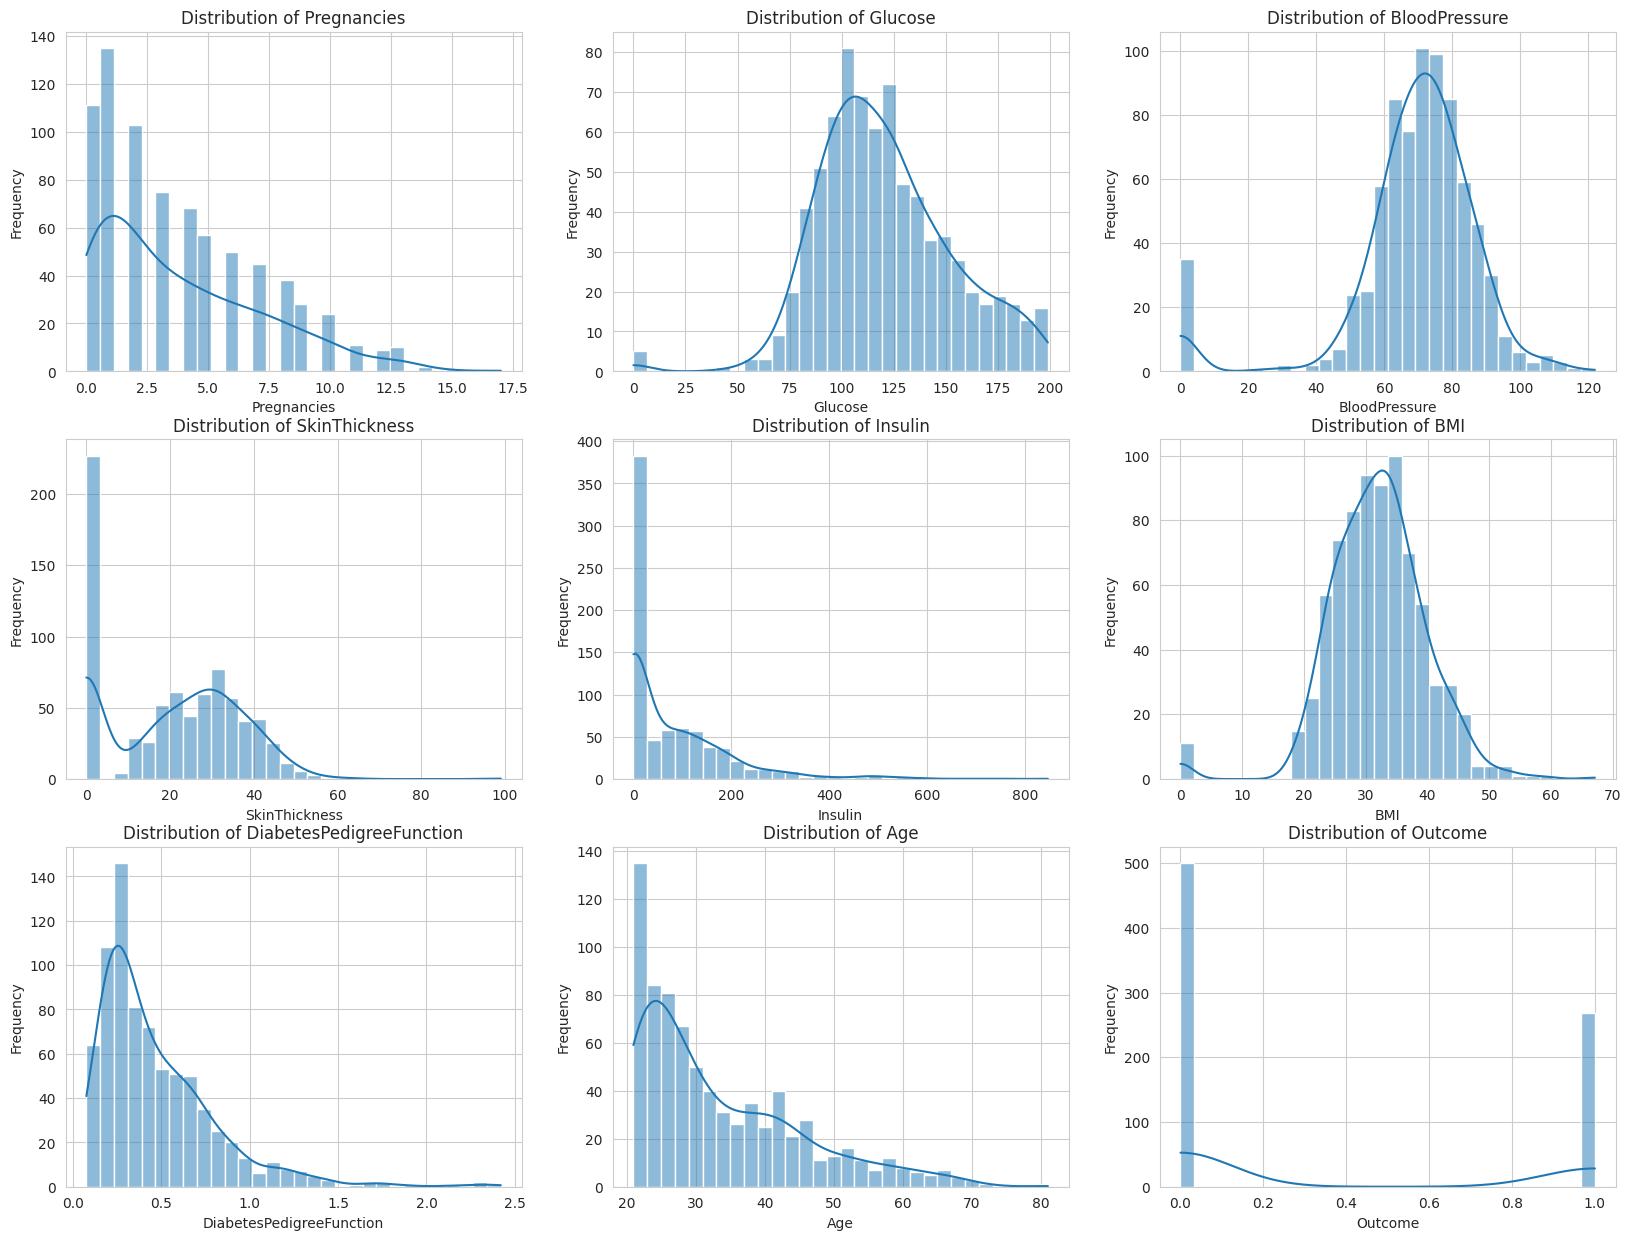

In [ ]:
# Initialize the figure
plt.figure(figsize=(20,15))

# Set the style for seaborn plots
sns.set_style('whitegrid')

# Plot histograms for each variable
for i, column in enumerate(df.columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[column], bins=30, kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.show()

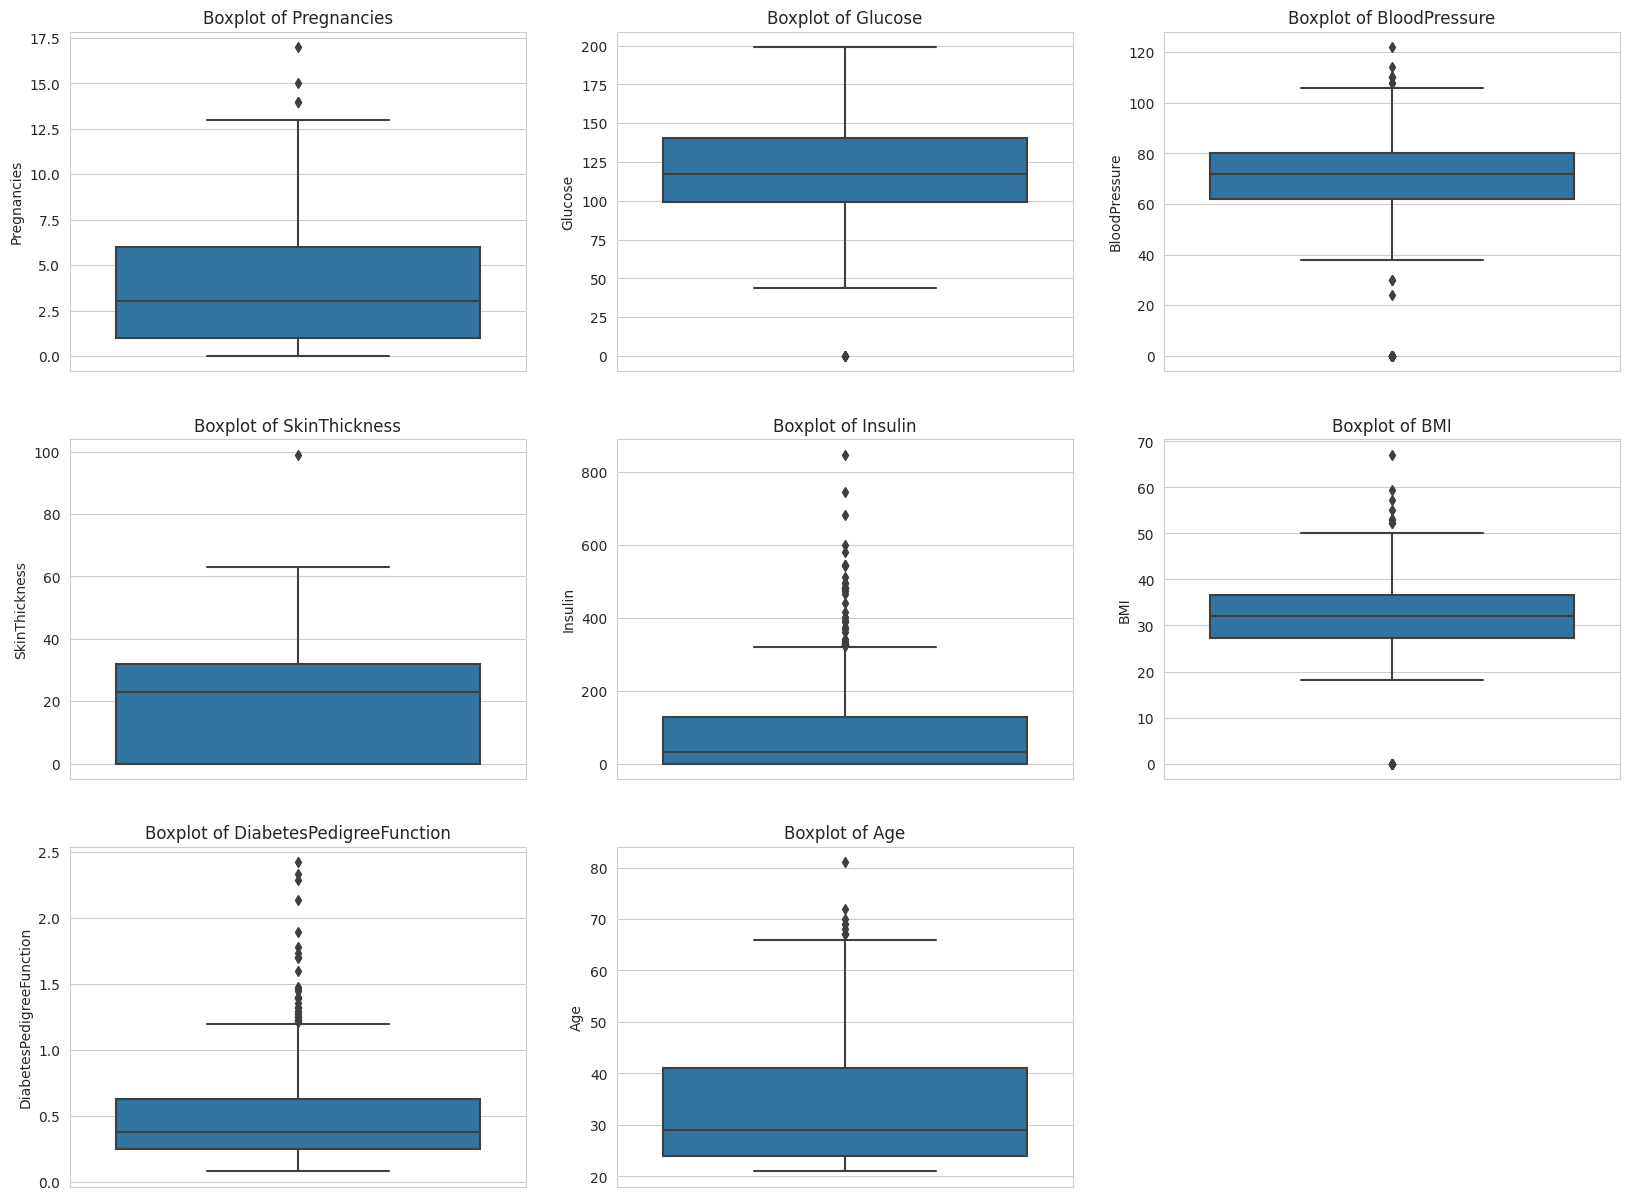

In [ ]:
# Initialize the figure for box plots
plt.figure(figsize= (20, 15))

# Plot boxplots for each variable (excluding Outcome)
for num, column in enumerate(df.columns[:-1], 1):
    plt.subplot(3,3,num)
    sns.boxplot(y= df[column])
    plt.title(f'Boxplot of {column}')
    plt.ylabel(column)

plt.show()

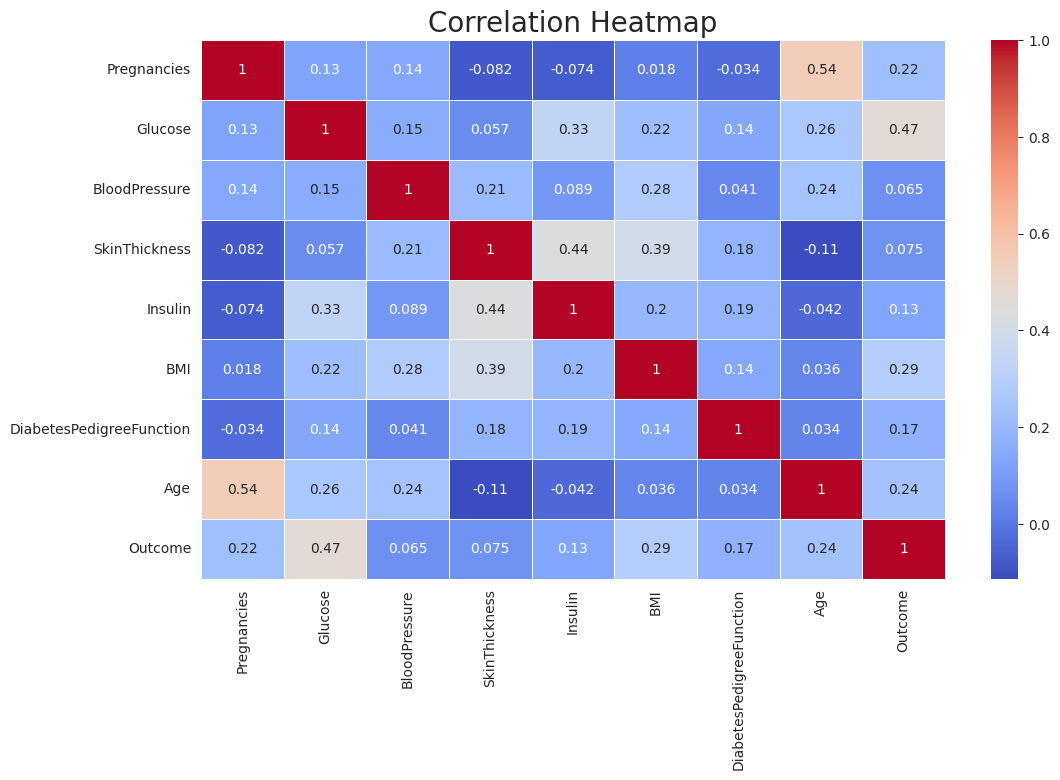

In [ ]:
# Correlation Matrix
correlation_matrix = df.corr()
correlation_matrix

# Correlation Heatmap
plt.figure(figsize= (12,7))
sns.heatmap(correlation_matrix, annot= True, cmap= 'coolwarm', linewidths= 0.5)
plt.title('Correlation Heatmap',fontsize= 20)
plt.show()

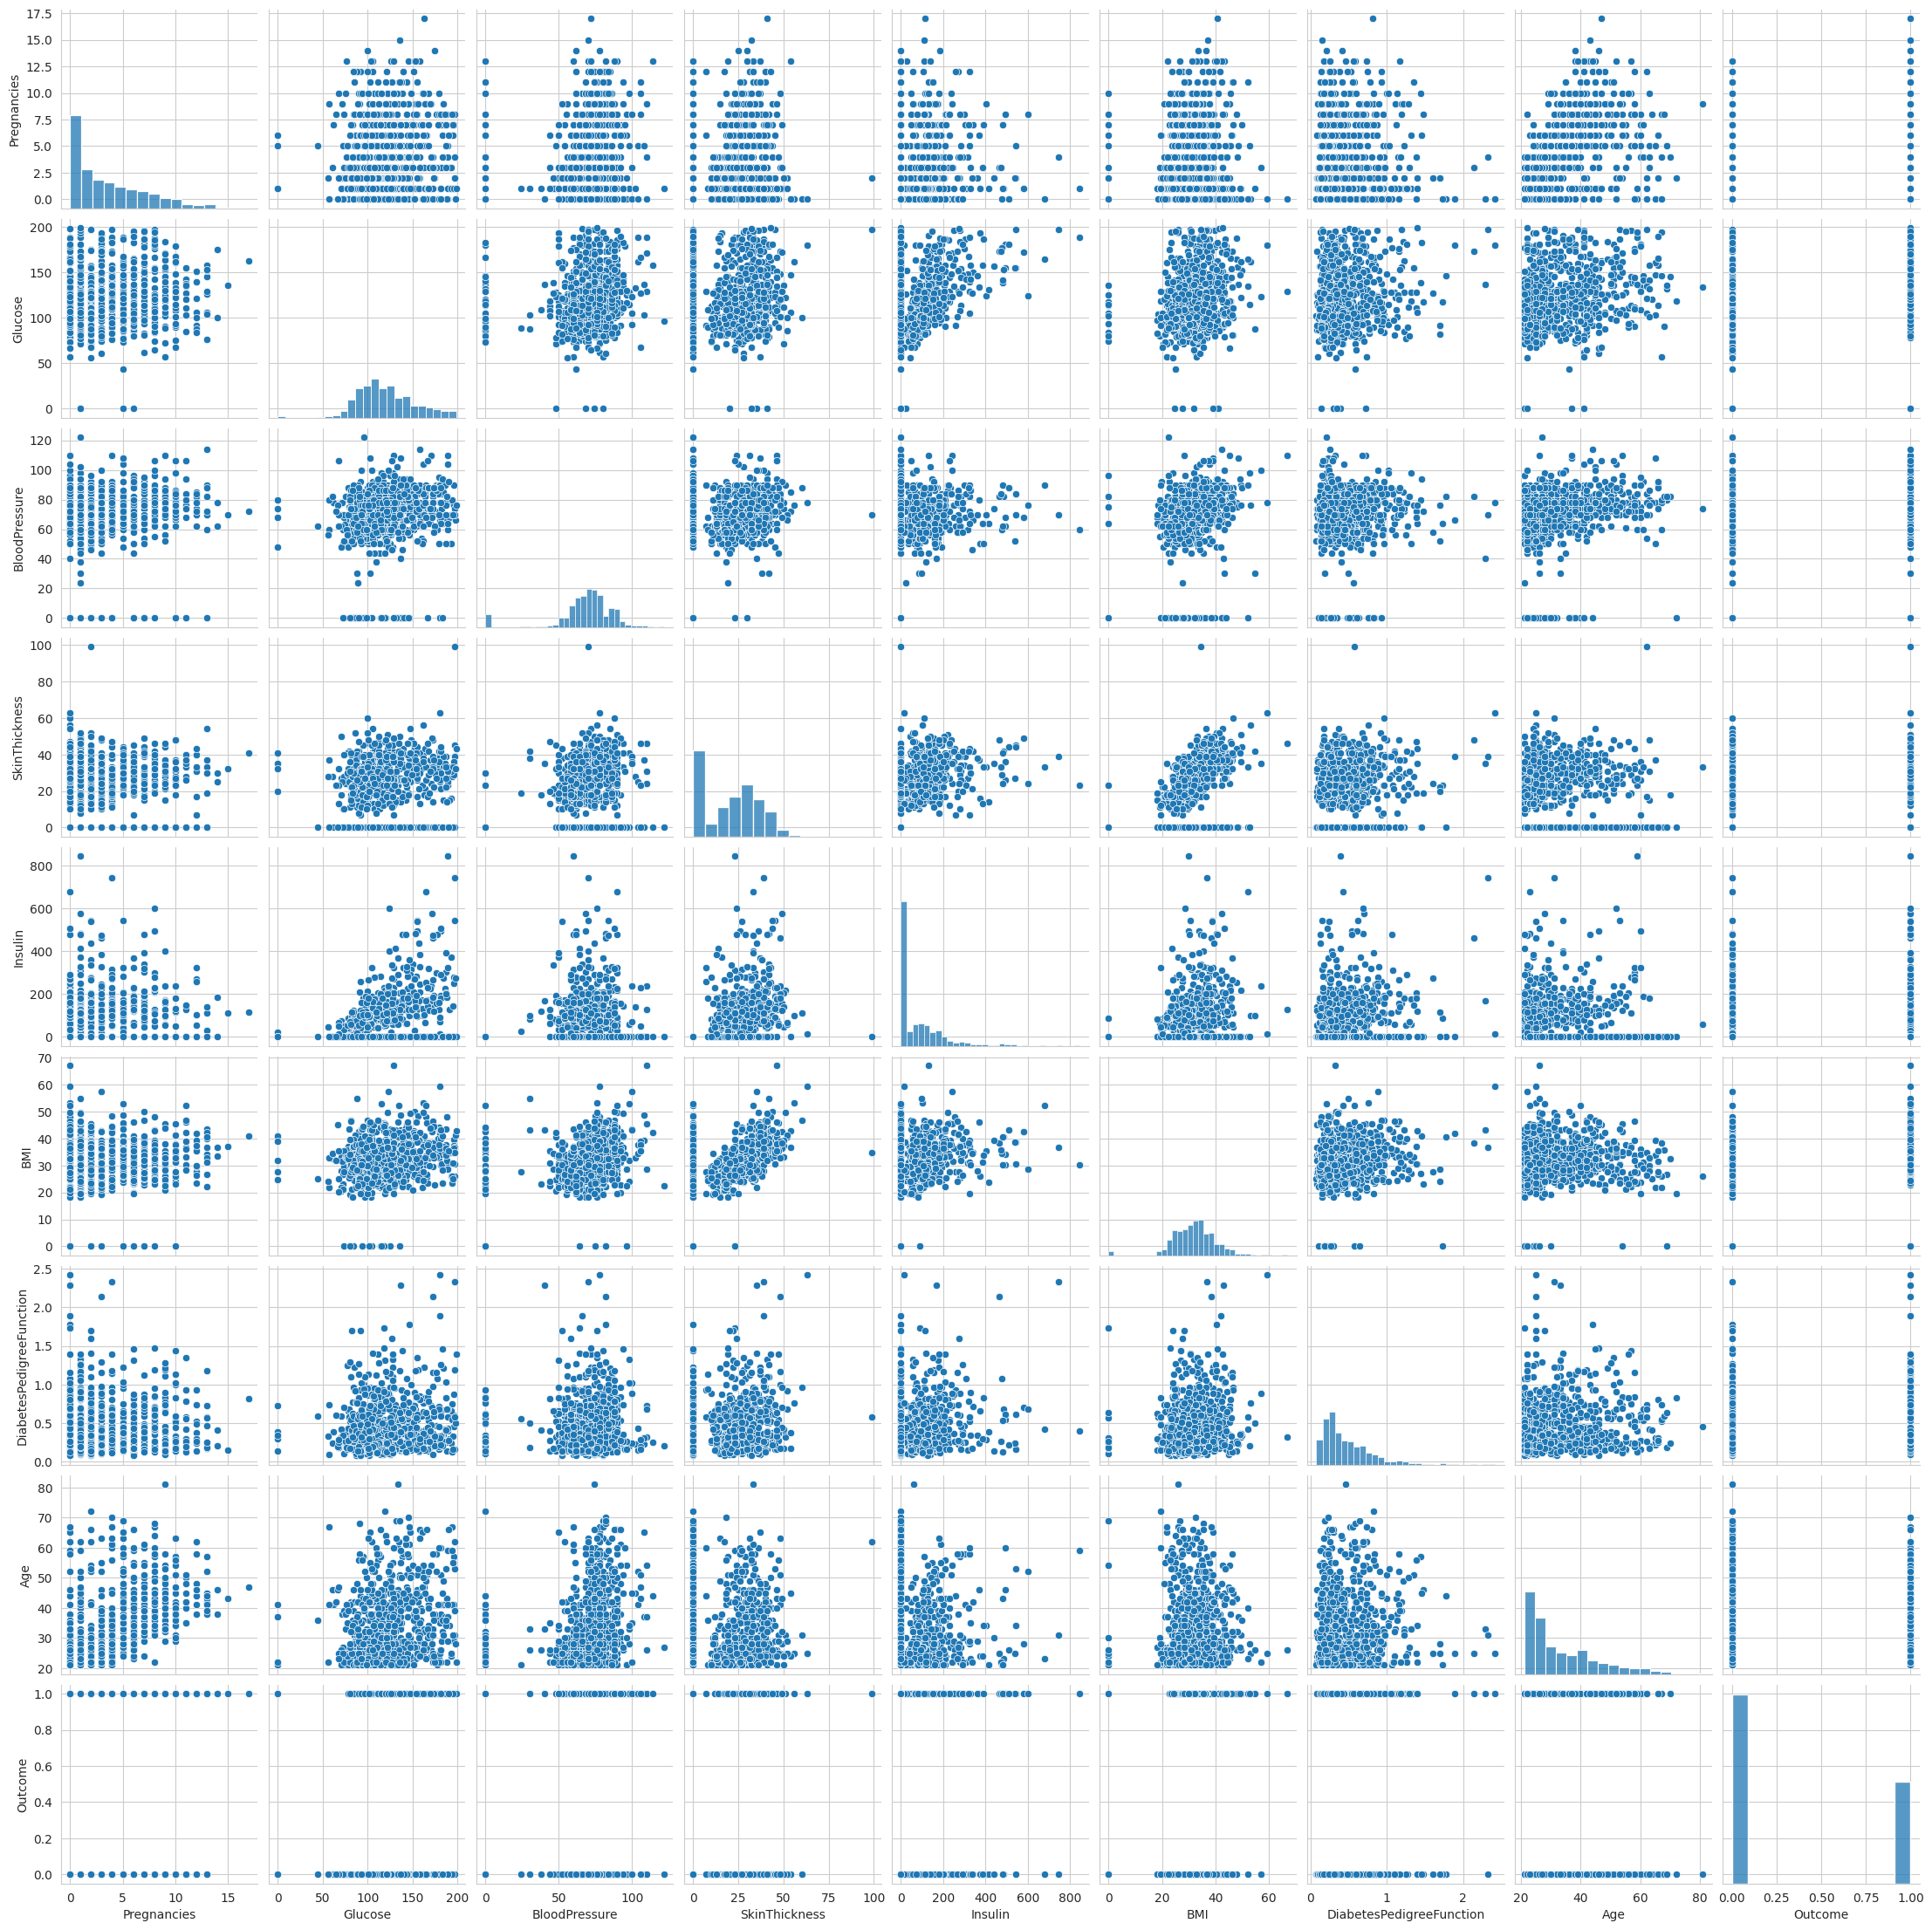

In [ ]:
sns.pairplot(df)

## Modeling

Before diving into the training of machine learning models, it's crucial to set the stage with proper data preparation.

In [ ]:
# Import Libraries

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import make_classification

Data Splitting :

In [ ]:
dependent_variable = 'Outcome'

# Create a list of independent variables
independent_variables = list((set(df.columns)) - {dependent_variable})

In [ ]:
independent_variables

['Age',
 'Glucose',
 'BloodPressure',
 'DiabetesPedigreeFunction',
 'Insulin',
 'Pregnancies',
 'SkinThickness',
 'BMI']

In [ ]:
# Define (X) and target (y)
x = df[independent_variables].values
y = df[dependent_variable].values

# Splitting the dataset into the Training set and Test sets (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 42)

x_train.shape, x_test.shape

((614, 8), (154, 8))

Logist Regression Model

Given the nature of our dataset and the problem at hand (binary classification), Logistic Regression serves as an appropriate starting point. It allows us to establish a baseline performance that we can use for comparison with more complex models we might consider later.

In [ ]:
# Initialize and train a Logistic Regression model
log_regressor = LogisticRegression(max_iter= 1000, random_state= 42)
log_regressor.fit(x_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
# Predicted value of y on test set
y_pred = log_regressor.predict(x_test)

In [ ]:
# Evaluate the model's performance
model_accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Model Accuracy is {model_accuracy}')
print(' ')
print('Class_Report')
print(class_report)
print('Confusion_Matrix')
print(conf_matrix)

Model Accuracy is 0.7467532467532467
 
Class_Report
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154

Confusion_Matrix
[[78 21]
 [18 37]]


####Hyperparameter Tuning with GridSearchCV

As we proceed further with modeling, it's crucial to ensure that our chosen algorithm performs optimally. One way to achieve this is by tuning the model's hyperparameters. Hyperparameters are parameters that are set before training a model, as opposed to parameters like weights, which are learned during training.

In [ ]:
# Generate a mock dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the hyperparameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']  # These solvers work with both l1 and l2 penalties
}

# Use GridSearchCV with Logistic Regression
logreg = LogisticRegression(max_iter=1000, random_state=42)
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Train the model on the training set and find the best hyperparameters
grid_search.fit(X_train, y_train)

# Evaluate the model with the best hyperparameters on the test set
best_logreg = grid_search.best_estimator_
y_pred = best_logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("GridSearch best parameters: ",grid_search.best_params_)
print(" ")
print("Accuracy :", accuracy)


GridSearch best parameters:  {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
 
Accuracy : 0.87


In [ ]:
# Initialize the Logistic Regression model with the best hyperparameters
best_logreg_model = LogisticRegression(C=0.1, penalty='l1', solver='liblinear', max_iter=1000, random_state=42)

# Train the model on training data
best_logreg_model.fit(X_train, y_train)

# After training, we can use the model to make predictions or evaluate it on test data
y_pred = best_logreg_model.predict(X_test)
# Compute the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")



Accuracy: 87.00%


In [ ]:
# Classification report
cls_report = classification_report(y_test, y_pred)
print(cls_report)

              precision    recall  f1-score   support

           0       0.82      0.92      0.87        93
           1       0.93      0.82      0.87       107

    accuracy                           0.87       200
   macro avg       0.87      0.87      0.87       200
weighted avg       0.88      0.87      0.87       200



****Conclusion:**** The model demonstrates good performance in distinguishing between individuals with and without diabetes. Both precision and recall are relatively high for both classes, indicating that the model makes reliable predictions and captures a high proportion of positive instances. The balanced F1-scores further suggest that there isn't a significant trade-off between precision and recall for either class. The results suggest that the model is well-suited for this binary classification task on the provided dataset.

#### Predicting the Onset of Diabetes for a Random Individual

After training our model and ensuring its performance through various evaluations, a practical application is to predict the likelihood of a new, unseen individual having diabetes. For this purpose, we can simulate a hypothetical individual by generating random values based on the original dataset's statistics. These values mimic a potential patient's health metrics.

In [ ]:
# Generate a random sample using the means and standard deviations from the original dataset
random_sample_values = {}
for column in df.columns[:-1]:  # Excluding the 'Outcome' column
    random_sample_values[column] = np.random.normal(loc= df[column].mean(), scale= df[column].std())

# Convert the dictionary to a DataFrame
random_sample_df = pd.DataFrame([random_sample_values])

# Use the tuned XGBoost model to make a prediction
predicted_class = log_regressor.predict(random_sample_df)

predicted_class[0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


1

In [ ]:
def predict_diabetes_status(sample, model):
    """Predict and print the diabetes status based on the input sample using the provided model."""
    prediction = model.predict(sample)
    if prediction[0] == 0:
        return "You don't have the chance to be diabetic."
    else:
        return "You have a chance to be diabetic."

# Use the function on the previously generated random sample
message = predict_diabetes_status(random_sample_df, log_regressor)
message


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


'You have a chance to be diabetic.'